In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
file_name = "portfolio_data.csv"
data = pd.read_csv(file_name)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
print(f"Data loaded successfully: {file_name}")

Data loaded successfully: portfolio_data.csv


Available columns in the dataset:
Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')
Enter the column name you want to analyze: BTC


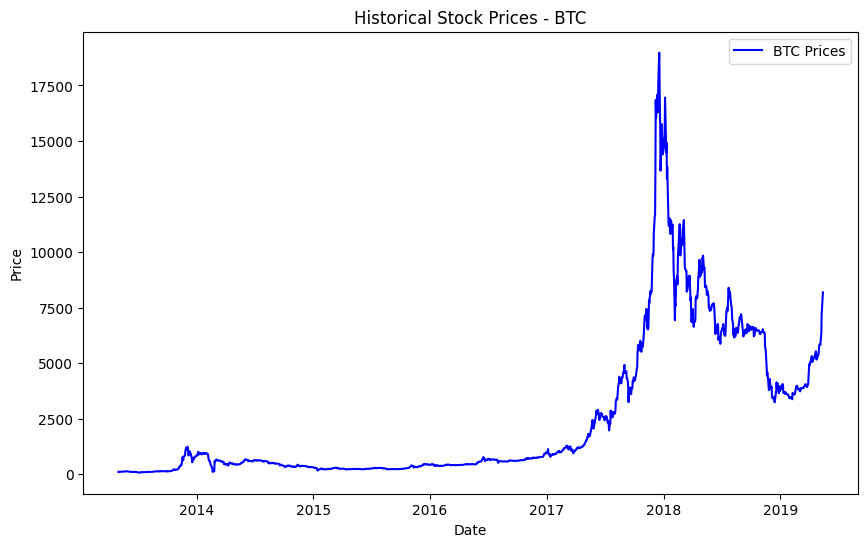

In [ ]:
print("Available columns in the dataset:")
print(data.columns)
stock_column = input("Enter the column name you want to analyze: ").strip()
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data[stock_column], label=f"{stock_column} Prices", color="blue")
plt.title(f"Historical Stock Prices - {stock_column}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
sequence_length = 60
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data = data[['Date', stock_column]].set_index('Date')
normalized_data = scaler.fit_transform(stock_data)

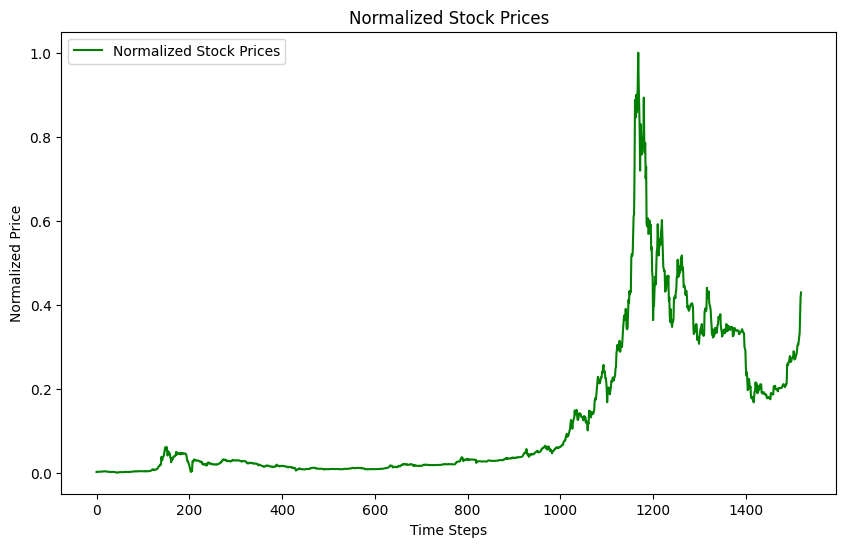

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(normalized_data, label="Normalized Stock Prices", color="green")
plt.title("Normalized Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

In [ ]:
sequences, targets = [], []
for i in range(len(normalized_data) - sequence_length):
    sequences.append(normalized_data[i:i + sequence_length])
    targets.append(normalized_data[i + sequence_length])

X = np.array(sequences)
y = np.array(targets)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0218 - val_loss: 0.0017
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 9.5593e-04 - val_loss: 0.0010
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 9.6086e-04 - val_loss: 0.0028
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - l

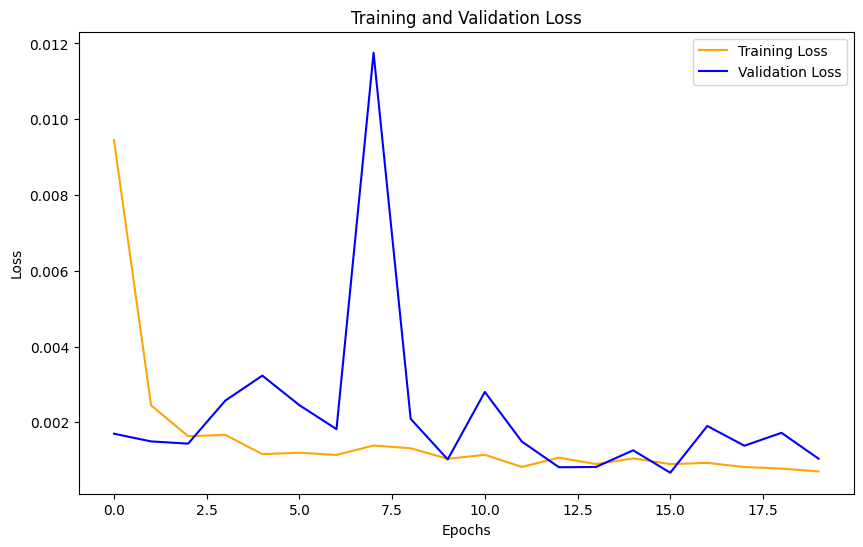

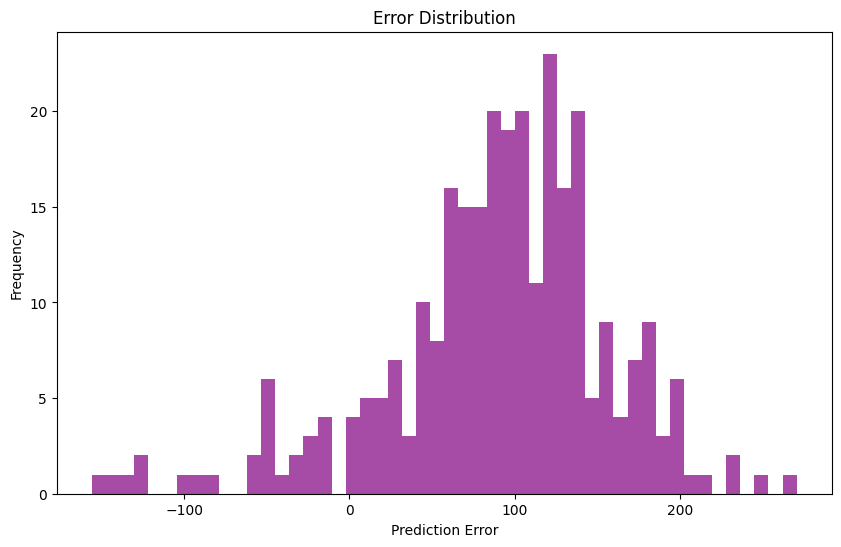

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color="orange")
plt.plot(history.history['val_loss'], label='Validation Loss', color="blue")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
errors = y_test_scaled.flatten() - predictions.flatten()
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color="purple", alpha=0.7)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

mean_actual_price = np.mean(y_test_scaled)x


relative_accuracy = 100 - (rmse / mean_actual_price) * 100


print(f"Mean Actual Price: {mean_actual_price:.2f}")
print(f"Relative Accuracy: {relative_accuracy:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Mean Squared Error (MSE): 371336.04
Mean Absolute Error (MAE): 491.36
Root Mean Squared Error (RMSE): 609.37
Mean Actual Price: 5966.02
Relative Accuracy: 89.79%


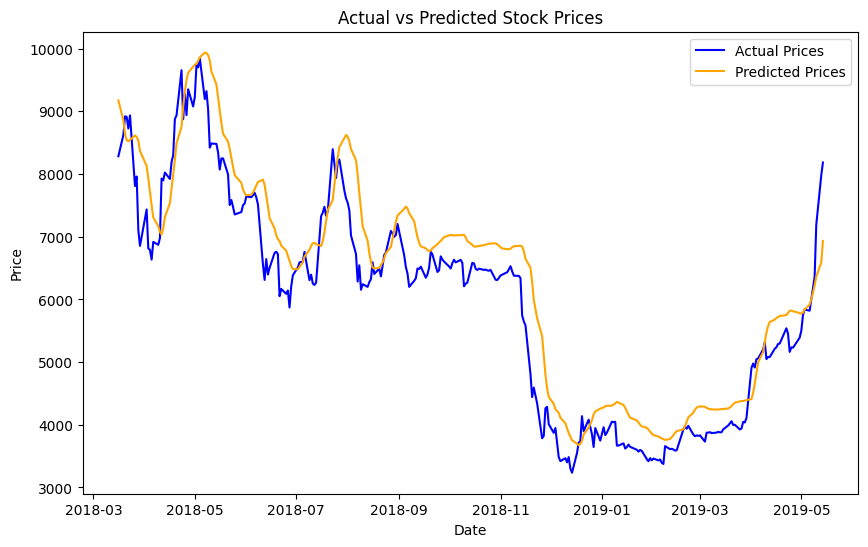

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[-len(y_test):], y_test_scaled, label="Actual Prices", color="blue")
plt.plot(stock_data.index[-len(y_test):], predictions, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

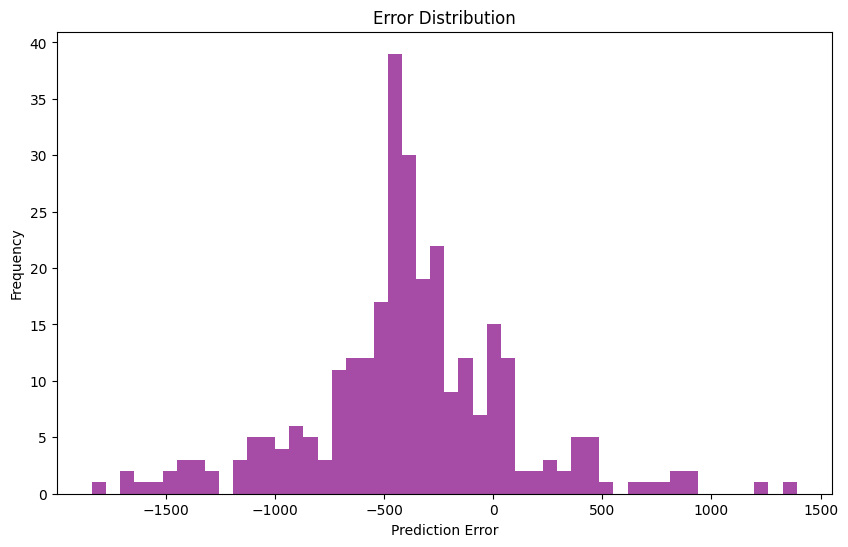

In [ ]:
errors = y_test_scaled.flatten() - predictions.flatten()
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color="purple", alpha=0.7)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
model_name = "lstm_stock_model.h5"
model.save(model_name)
print(f"Model saved as {model_name}")

Model saved as lstm_stock_model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

RNN Accuracy: 0.5050
LSTM Accuracy: 0.5300
Combined Model Accuracy: 0.5175


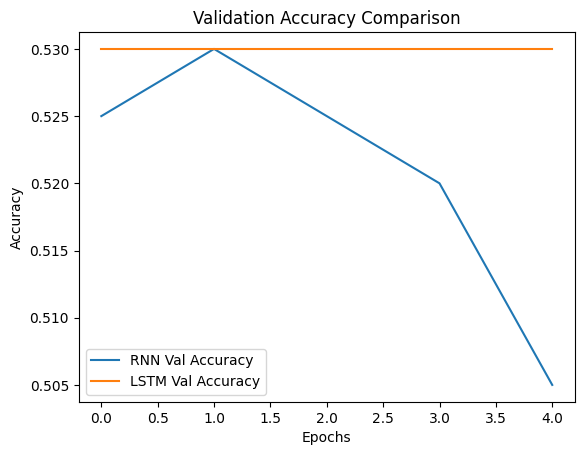

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample data generation
X = np.random.rand(1000, 10, 1)
y = np.random.randint(0, 2, size=(1000,))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()
rnn_history = rnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)

# LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=0)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)

# Combine accuracies
combined_accuracy = (rnn_accuracy + lstm_accuracy) / 2
print(f"RNN Accuracy: {rnn_accuracy:.4f}")
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")
print(f"Combined Model Accuracy: {combined_accuracy:.4f}")

# Compare performance
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
